# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [95]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [96]:
# Combine the data into a single DataFrame
full_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
full_results.head()
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [97]:
# Checking the number of mice.
mice_count = full_results['Mouse ID'].nunique()
print(mice_count)

249


In [98]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#use keep='first' to keep the first instance of the duplicate to print a single list of duplicates instead of every duplicate
duplicates = full_results[full_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [99]:
# Optional: Get all the data for the duplicate mouse ID. 


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#filter on mouse id and keep the values not equal to g989, !=
#conditional: in the full_Results data frame, locate all the rows where the mouse ID column, return and store in new variable
full_results_cleaned = full_results.loc[full_results['Mouse ID'] !='g989']
full_results_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame.
cleanedmice = full_results_cleaned['Mouse ID'].nunique()
print(cleanedmice)


248


## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [103]:
summary_statistics = full_results_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [105]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single = full_results_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_single

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

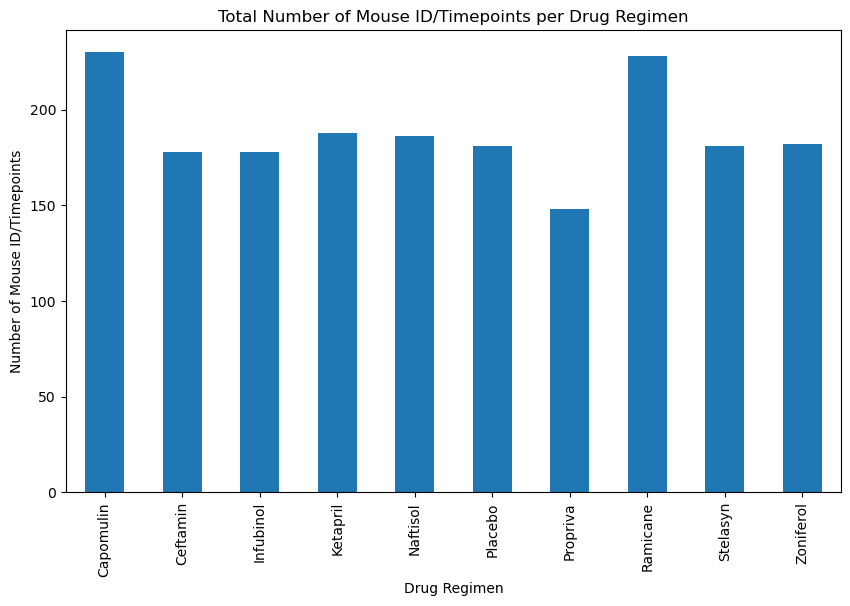

In [106]:
# Directions: Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#bar plot from full_results_cleaned with number of observed mouse time points on the y axis and drug regimen on the x axis
mousecount = full_results_cleaned.groupby('Drug Regimen')['Mouse ID'].count()

# Plot the bar plot
mousecount.plot(kind='bar', figsize=(10, 6), title='Total Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.show()


In [107]:
#if you add .reset to the end of your groupby function then you can use the matplot lib way to reset the dataframe
mousecount2 = mousecount.reset_index()
mousecount2

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


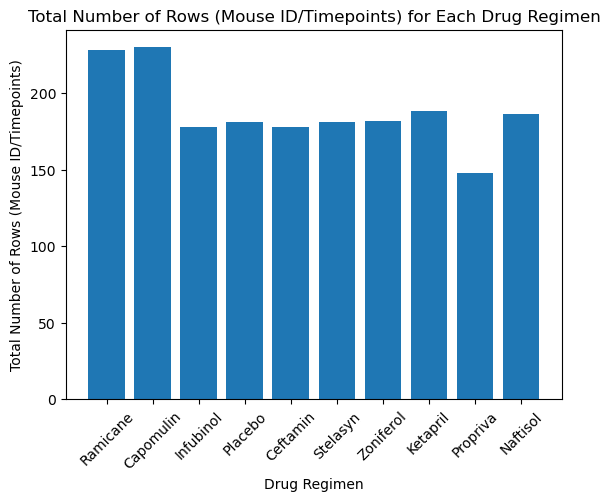

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#ask in office hours if I can use the .unique() function here

# Extract the unique drug regimens
drug_regimens = full_results_cleaned['Drug Regimen'].unique()

# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = [len(full_results_cleaned[full_results_cleaned['Drug Regimen'] == regimen]) for regimen in drug_regimens]

# Generating the bar plot
plt.bar(drug_regimens, row_counts)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malemice = full_results_cleaned.count('Sex'=='Male')
print(malemice)

# Calculate the percentage of male mice
percent_male = (len(malemice) / len(full_results_cleaned)) * 100
percent_male

In [ ]:

female_mice = full_results_cleaned[full_results_cleaned['Sex'] == 'Female']

# Calculate the percentage of male mice
percent_female = (len(female_mice) / len(full_results_cleaned)) * 100
percent_female


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [percent_male, percent_female]
labels = ['Male', 'Female']

# Plotting the pie chart
#update with the sizes from class
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = full_results_cleaned['Sex'].value_counts()

# Plot the pie chart
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Male vs. Female')
plt.ylabel('')  
plt.axis('equal')  
plt.show()



## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
#the last will be the largest in this case
#reset_index puts a groupby series (when returning one column) back into a dataframe
finaltimepoint = full_results_cleaned.groupby('Mouse ID')['Timepoint'].max().reset_index()
finaltimepoint
#merge the data frame with the og, it's helpful the aggregate when you're gonna need to filter by another column
lasttumorvol = pd.merge(finaltimepoint, full_results_cleaned, how="left", on=["Mouse ID", "Timepoint"])
lasttumorvol
#mouse id and timepoint are first because that's how we set up finaltimepoint and it's a left join

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [113]:
# Assuming 'Timepoint' is the index and represents the time of measurement


regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volumes= []

for drug in regimens:
    
    tumorvolumes = lasttumorvol.loc[lasttumorvol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volumes.append(tumor_volumes)
    


[[...], [...], [...], [...]]


TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed

In [116]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volumes= []

for drug in regimens:
    
    tumorvolumes = lasttumorvol.loc[lasttumorvol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volumes.append(tumor_volumes)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#find out if this IQR is for the last tumor volumes or for all tumor volumes
quartiles = tumorvolumes.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = tumorvolumes.loc[(tumorvolumes < lower_bound) | (tumorvolumes > upper_bound)]

print(f"Regimen: (drug)")
print(f"Lower Quartile: {lowerq: 2f}")
print(f"IQR: {iqr: .2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound: .2f}")
print(f"IQR: {iqr:.2f}")
print(f"For {drug}, the outliers are: {outliers}")

outliers = tumorvolumes.loc[(tumorvolumes < lower_bound) | (tumorvolumes > upper_bound)]

if not outliers.empty:
    print(f"Potential Outliers:")
    print(outliers)
else:
    print("No outliers.")

print(f"..............................")
print("\n")
   


Regimen: (drug)
Lower Quartile:  48.722078
IQR:  15.58
Lower Bound: 25.36
Upper Bound:  87.67
IQR: 15.58
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
No outliers.
..............................




In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10,6))
plt.boxplot(tumor_volumes, labels=regimens)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

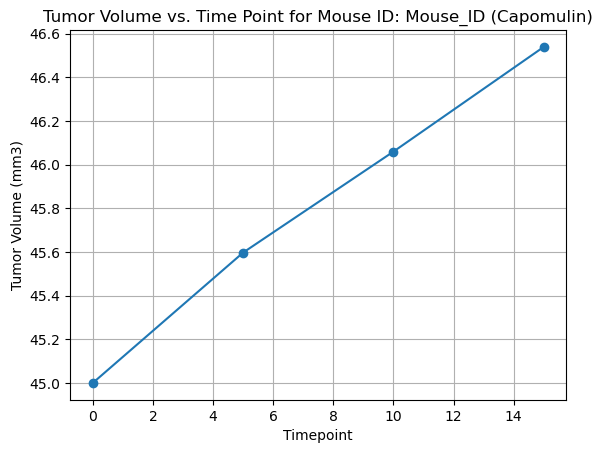

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = full_results_cleaned[full_results_cleaned['Drug Regimen'] == 'Capomulin']
capomulin_data

# Choosing a single mouse from the filtered data (replace 'Mouse_ID' with the actual ID of the mouse)
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'r157']

# Plot tumor volume vs. time point for the single mouse
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs. Time Point for Mouse ID: Mouse_ID (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

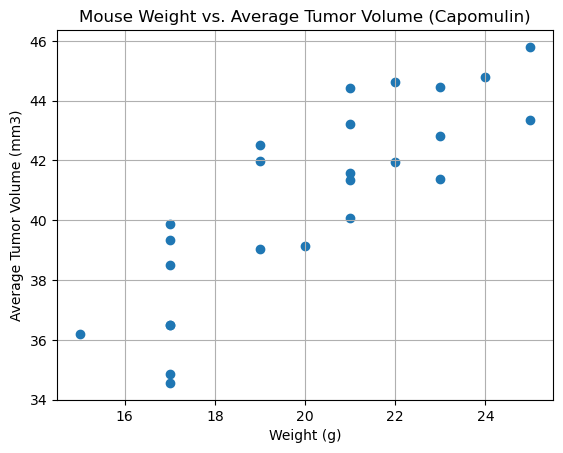

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Merge the two grouped DataFrames based on mouse ID
merged_data = pd.merge(mouse_weight, average_tumor_volume, on='Mouse ID')

# Plot mouse weight vs. average tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

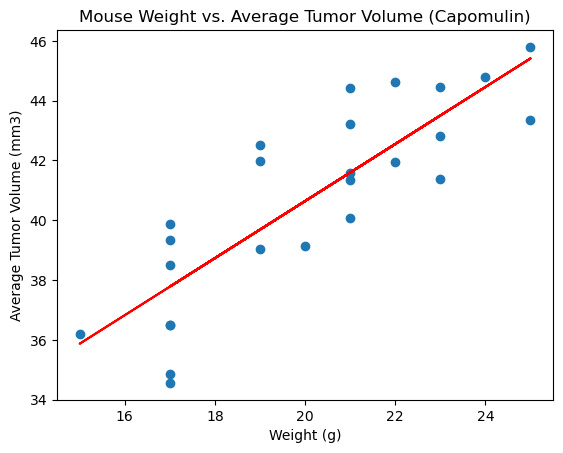

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Add linear regression line to the plot
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print("The correlation between mouse weight and the average tumor volume is", correlation_coefficient)

